In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,models
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [2]:
img_height,img_width=200,200
train_dir= r"C:\Users\Sakshi\Downloads\Plant_Disease_Dataset\New Plant Diseases Dataset(Augmented)\train"
test_dir= r"C:\Users\Sakshi\Downloads\Plant_Disease_Dataset\New Plant Diseases Dataset(Augmented)\test"
valid_dir= r"C:\Users\Sakshi\Downloads\Plant_Disease_Dataset\New Plant Diseases Dataset(Augmented)\valid"

In [3]:
input_shape=(img_height,img_width,3)
num_classes=10

train_ds = image_dataset_from_directory(
    train_dir,
    label_mode='categorical',
    labels='inferred',
    shuffle=True,
    seed=69,
    image_size=(img_height,img_width),
    batch_size=16
)

valid_ds = image_dataset_from_directory(
    valid_dir,
    label_mode='categorical',
    labels='inferred',
    shuffle=True,
    seed=69,
    image_size=(img_height,img_width),
    batch_size=16
)

Found 18504 files belonging to 10 classes.
Found 4626 files belonging to 10 classes.


In [6]:
test_ds = image_dataset_from_directory(
    test_dir,
    label_mode='categorical',
    labels='inferred',
    image_size=(img_height,img_width),
    batch_size=16
)

Found 33 files belonging to 1 classes.


In [7]:
def cnn(input_shape=(256,256,3),num_classes=10):
    model = keras.models.Sequential([
        layers.Conv2D(16,(3,3),activation='relu',input_shape=input_shape),
        layers.MaxPooling2D((2,2)),

        layers.Conv2D(32,(3,3),activation='relu'),
        layers.MaxPooling2D((2,2)),

        
        layers.Conv2D(128,(3,3),activation='relu'),
        layers.MaxPooling2D((2,2)),

        layers.Flatten(),

        layers.Dense(128,activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10,activation='softmax')
    ])
    return model

In [8]:
model = cnn(input_shape,num_classes)

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

model.summary()

C:\Users\Sakshi\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 198, 198, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 99, 99, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 97, 97, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 48, 48, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 46, 46, 128)         │          36,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 23, 23, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 67712)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       8,667,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,710,634 (33.23 MB)

 Trainable params: 8,710,634 (33.23 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
hist = model.fit(train_ds,epochs=10,validation_data=valid_ds)

Epoch 1/10
1157/1157 ━━━━━━━━━━━━━━━━━━━━ 193s 165ms/step - accuracy: 0.4900 - loss: 11.9931 - val_accuracy: 0.8794 - val_loss: 0.3999
Epoch 2/10
1157/1157 ━━━━━━━━━━━━━━━━━━━━ 185s 160ms/step - accuracy: 0.7919 - loss: 0.6238 - val_accuracy: 0.9213 - val_loss: 0.2680
Epoch 3/10
1157/1157 ━━━━━━━━━━━━━━━━━━━━ 193s 167ms/step - accuracy: 0.8634 - loss: 0.4271 - val_accuracy: 0.9058 - val_loss: 0.3091
Epoch 4/10
1157/1157 ━━━━━━━━━━━━━━━━━━━━ 164s 142ms/step - accuracy: 0.8774 - loss: 0.4166 - val_accuracy: 0.9343 - val_loss: 0.2046
Epoch 5/10
1157/1157 ━━━━━━━━━━━━━━━━━━━━ 152s 132ms/step - accuracy: 0.9151 - loss: 0.2655 - val_accuracy: 0.9395 - val_loss: 0.2455
Epoch 6/10
1157/1157 ━━━━━━━━━━━━━━━━━━━━ 157s 135ms/step - accuracy: 0.8873 - loss: 0.3928 - val_accuracy: 0.9529 - val_loss: 0.1602
Epoch 7/10
1157/1157 ━━━━━━━━━━━━━━━━━━━━ 401s 347ms/step - accuracy: 0.9231 - loss: 0.2574 - val_accuracy: 0.9386 - val_loss: 0.2028
Epoch 8/10
1157/1157 ━━━━━━━━━━━━━━━━━━━━ 150s 130ms/step - a

In [10]:
test_loss,test_acc = model.evaluate(valid_ds)
print("Accuracy:",test_acc*100)

290/290 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - accuracy: 0.9495 - loss: 0.2252
Accuracy: 95.43882608413696


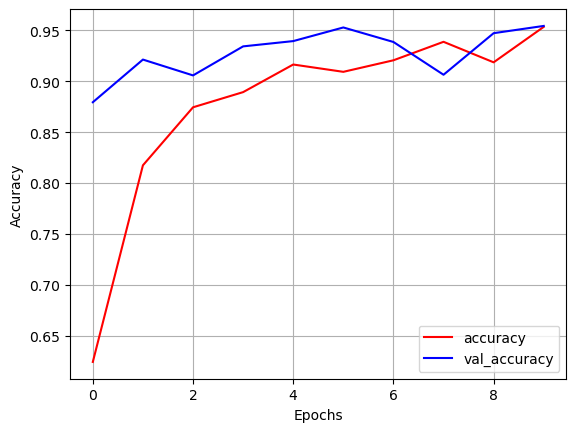

In [14]:
import matplotlib.pyplot as plt

fig = plt.figure()

plt.plot(hist.history['accuracy'],color='red',label='accuracy')
plt.plot(hist.history['val_accuracy'],color='blue',label='val_accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

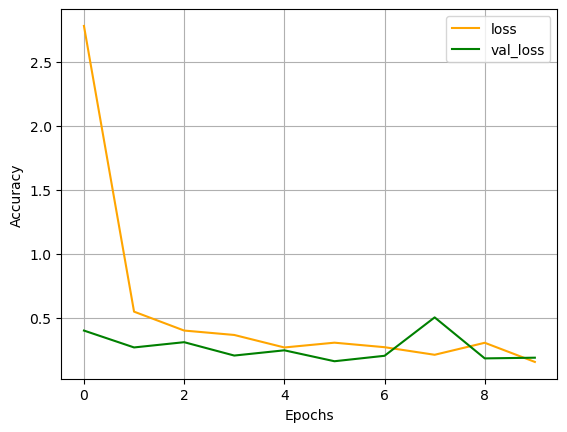

In [15]:
fig2 = plt.figure()

plt.plot(hist.history['loss'],color='orange',label='loss')
plt.plot(hist.history['val_loss'],color='green',label='val_loss')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()